# Initialization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
from torch import distributions, optim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GitHub/master-thesis

import sys
sys.path.append('/content/gdrive/My Drive/GitHub/master-thesis')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GitHub/master-thesis


In [ ]:
#%cd ..


In [ ]:
from model.methods import *
from model.modelcore import epid_model
from model.modelhelper import *

# Optimization Settings

In [ ]:
observation = 'hospitalization' #'newly_infected' #'hospitalization'
rolling_avg_obs = 2
# Overall Time Period
start_time='2020-07-31' # Mitte November/ Anfang Dezember bis Februar
end_time='2021-02-01' # Begin Vaccination Wave


train_test_split_time= end_time #'2020-12-01'


dtype = torch.float32
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #cuda:0

# Initialize Observations

In [ ]:
df_obs_initial = pd.read_csv('data/220309_observations.csv' , sep=';', thousands='.', decimal=',', encoding='utf-8', parse_dates=['Date'])

# Initialize Observations Training
df_obs_train, initial_newly_infected = initialize_observations(df_obs_initial, start=start_time, end=train_test_split_time, rolling_avg=rolling_avg_obs)
observed_train = torch.tensor(df_obs_train[observation], requires_grad=False, device=device, dtype=dtype)

# Initialize Observations Testing
df_obs_test, _ = initialize_observations(df_obs_initial, start=train_test_split_time, end=end_time, rolling_avg=rolling_avg_obs)
observed_test = torch.tensor(df_obs_test[observation], requires_grad=False, device=device, dtype=dtype)

# Create df_obs
observed_train_test = torch.concat((observed_train, observed_test))
df_obs = pd.concat([df_obs_train, df_obs_test])
df_obs = df_obs.reset_index(drop=True)
df_obs.head(3)

,Date,number_of_deaths,newly_infected,hospitalization
0,2020-07-31,0.5,71.0,4.0
1,2020-08-01,0.5,61.0,3.5
2,2020-08-02,0.0,71.0,3.0


# Initialize Parameter

In [ ]:
cero = torch.tensor(0., requires_grad=False, device=device, dtype=dtype)
method = RandomWalk(n_observations = df_obs.shape[0], device=device, dtype=dtype)
dict_param = initialize_parameter(['alpha', 'phi'], device, dtype)
dict_param

{'prime_values': {'alpha': tensor(0.0102, requires_grad=True),
  'phi': tensor(-0., requires_grad=True)},
 'real_values': {'alpha': tensor(0.0280, grad_fn=<AddBackward0>),
  'phi': tensor(25., grad_fn=<AddBackward0>)}}

# Optimization

Step: 0, Learning Rate: 0.00999 Time: 0.1622, Comparison Loss: 106046.5234375, Phi: 25.0 


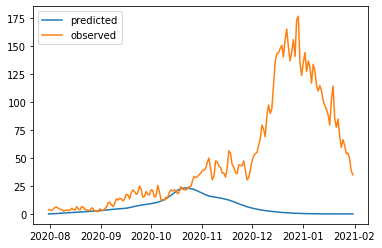

Step: 50, Learning Rate: 0.00950254422568834 Time: 0.1778, Comparison Loss: 37373.98828125, Phi: 24.887235641479492 
Step: 100, Learning Rate: 0.009038873549665948 Time: 0.1243, Comparison Loss: 3713.882568359375, Phi: 24.853647232055664 


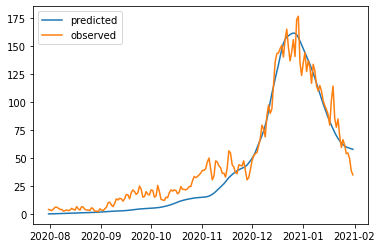

Step: 150, Learning Rate: 0.008597827393003531 Time: 0.0684, Comparison Loss: 1592.8504638671875, Phi: 24.847637176513672 
Step: 200, Learning Rate: 0.008178301806491574 Time: 0.0584, Comparison Loss: 1363.3402099609375, Phi: 24.843969345092773 


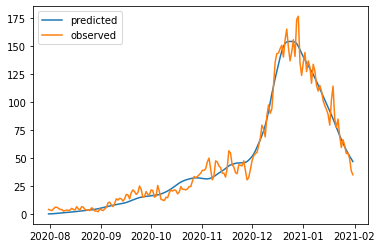

Step: 250, Learning Rate: 0.00777924670742873 Time: 0.0605, Comparison Loss: 1241.252685546875, Phi: 24.840484619140625 
Step: 300, Learning Rate: 0.007399663251239432 Time: 0.0647, Comparison Loss: 1159.6783447265625, Phi: 24.837081909179688 


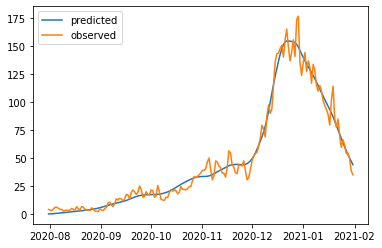

Step: 350, Learning Rate: 0.007038601331341688 Time: 0.0598, Comparison Loss: 1104.5181884765625, Phi: 24.833724975585938 
Step: 400, Learning Rate: 0.006695157201007331 Time: 0.0619, Comparison Loss: 1067.7030029296875, Phi: 24.830402374267578 


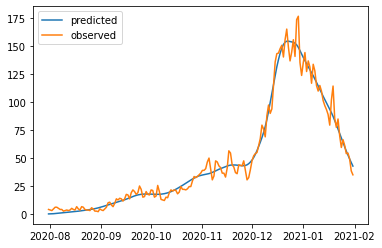

Step: 450, Learning Rate: 0.006368471211262053 Time: 0.0628, Comparison Loss: 1043.331787109375, Phi: 24.82709312438965 
Step: 500, Learning Rate: 0.006057725659163231 Time: 0.0617, Comparison Loss: 1027.1480712890625, Phi: 24.823789596557617 


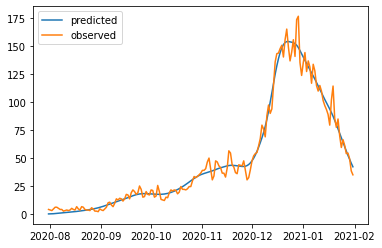

Step: 550, Learning Rate: 0.0057621427410696376 Time: 0.0595, Comparison Loss: 1016.2556762695312, Phi: 24.82048797607422 
Step: 600, Learning Rate: 0.005480982605780108 Time: 0.071, Comparison Loss: 1008.782470703125, Phi: 24.81718635559082 


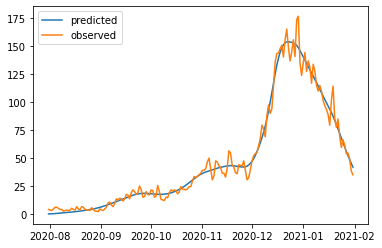

Step: 650, Learning Rate: 0.005213541502668067 Time: 0.0637, Comparison Loss: 1003.5537719726562, Phi: 24.813888549804688 
Step: 700, Learning Rate: 0.004959150020176671 Time: 0.064, Comparison Loss: 999.83056640625, Phi: 24.81060028076172 


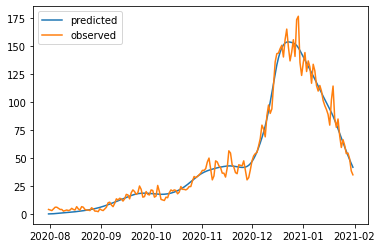

Step: 750, Learning Rate: 0.004717171410265472 Time: 0.0601, Comparison Loss: 997.1417236328125, Phi: 24.807321548461914 
Step: 800, Learning Rate: 0.004486999994614646 Time: 0.0677, Comparison Loss: 995.1781616210938, Phi: 24.804065704345703 


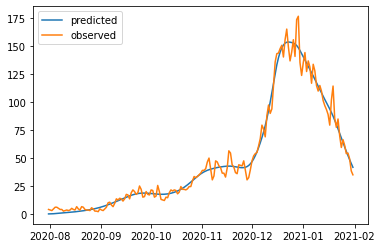

Step: 850, Learning Rate: 0.004268059648597501 Time: 0.064, Comparison Loss: 993.7315673828125, Phi: 24.800827026367188 
Step: 900, Learning Rate: 0.0040598023592265855 Time: 0.0612, Comparison Loss: 992.658935546875, Phi: 24.7976131439209 


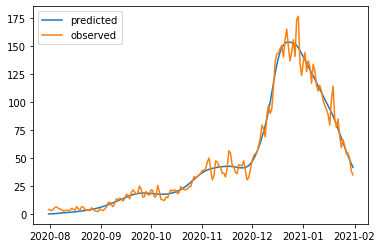

Step: 950, Learning Rate: 0.0038617068534639145 Time: 0.0614, Comparison Loss: 991.86083984375, Phi: 24.79442596435547 
Step: 1000, Learning Rate: 0.0036732772934619236 Time: 0.0638, Comparison Loss: 991.2659301757812, Phi: 24.791275024414062 


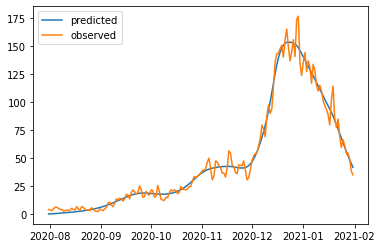

Step: 1050, Learning Rate: 0.00349404203546934 Time: 0.0618, Comparison Loss: 990.8224487304688, Phi: 24.78815460205078 
Step: 1100, Learning Rate: 0.0033235524492954472 Time: 0.0657, Comparison Loss: 990.4942626953125, Phi: 24.785072326660156 


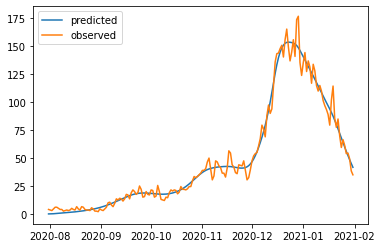

Step: 1150, Learning Rate: 0.0031613817953778573 Time: 0.0592, Comparison Loss: 990.2520751953125, Phi: 24.78203010559082 
Step: 1200, Learning Rate: 0.0030071241566430543 Time: 0.0603, Comparison Loss: 990.0765991210938, Phi: 24.779029846191406 


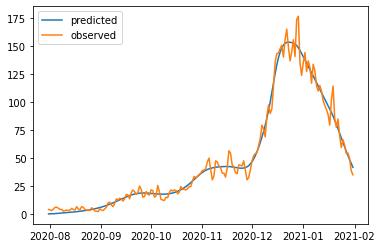

Step: 1250, Learning Rate: 0.0028603934224861256 Time: 0.064, Comparison Loss: 989.9508666992188, Phi: 24.776073455810547 
Step: 1300, Learning Rate: 0.0027208223223265725 Time: 0.0728, Comparison Loss: 989.8643188476562, Phi: 24.773162841796875 


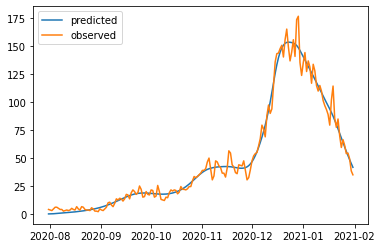

Step: 1350, Learning Rate: 0.002588061506321153 Time: 0.0628, Comparison Loss: 989.8070068359375, Phi: 24.770296096801758 
Step: 1400, Learning Rate: 0.002461778670932766 Time: 0.0647, Comparison Loss: 989.7723999023438, Phi: 24.76747703552246 


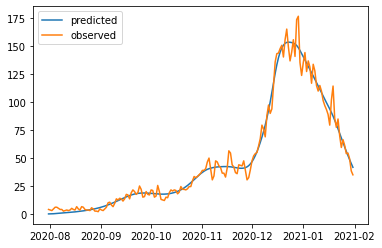

Step: 1450, Learning Rate: 0.0023416577271666533 Time: 0.0625, Comparison Loss: 989.7553100585938, Phi: 24.764705657958984 


In [ ]:
from torch.optim.lr_scheduler import ExponentialLR

epochs = 1500
# model_parameter = [dict_param['prime_values']['alpha'], dict_param['prime_values']['phi']] + [dict_param['prime_values']['epsilon']]

params_to_be_optimized = method.get_parameters() + [dict_param['prime_values']['phi']]
if observation == 'hospitalization':
  params_to_be_optimized = params_to_be_optimized + [dict_param['prime_values']['alpha']]

optimizer = optim.Adam(params_to_be_optimized, lr=0.01)
scheduler = ExponentialLR(optimizer, gamma=0.999)
list_R0 = []
list_sigma = []
list_phi = []
list_alpha = []

for i in range(epochs):
  iteration_time = time.time()
  optimizer.zero_grad()

  # transform alphi, phi
  dict_param = transform_prime_variables(dict_param)
  list_R0.append(method.get_R0().item())
  list_sigma.append(method.get_sigma().item())
  list_phi.append(dict_param['real_values']['phi'].item())
  list_alpha.append(dict_param['real_values']['alpha'].item())

  # forward pass
  expected = epid_model(R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation][:df_obs_train.shape[0]] #method.cluster_percentage_train
  
  # calc loss
  comparison_loss_train =  calc_mse(expected, observed_train) * dict_param['real_values']['phi'] #calc_negative_binomnial_loss(expected, observed_train, dict_param['real_values']['phi'])# 
  method_loss = method.calculate_loss()
  model_param_loss = calc_prior_loss(dict_param, device, dtype)
  loss = comparison_loss_train + method_loss + model_param_loss

  # backward pass
  loss.backward()
  optimizer.step()
  scheduler.step()
  
  
  with torch.no_grad():
    if i % 50==0:
        current_time = round((time.time() - iteration_time),4)
        current_lr = optimizer.state_dict()['param_groups'][0]['lr']
        expected_test = epid_model(R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation][-df_obs_test.shape[0]:] #method.cluster_percentage_test
        print(f"Step: {i}, Learning Rate: {current_lr} Time: {current_time}, Comparison Loss: {comparison_loss_train}, Phi: {dict_param['real_values']['phi']} ")

    if i % 100==0:
      plt.plot(df_obs_train['Date'], expected.cpu().detach().numpy(), label='predicted')
      plt.plot(df_obs_train['Date'], observed_train.cpu().detach().numpy(), label='observed')
      plt.legend()
      plt.show()

# Evaluation

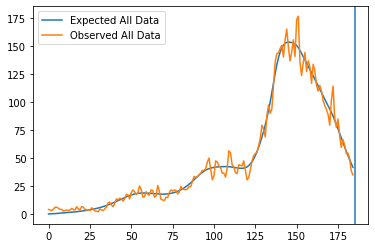

In [ ]:
expected_train_test = epid_model(R=method.calculate_R(), initial_newly_infected = initial_newly_infected, alpha=dict_param['real_values']['alpha'], device=device, dtype=dtype)[observation] #cluster_percentage_train_test
plt.plot(expected_train_test.cpu().detach().numpy(),label='Expected All Data')
plt.plot(observed_train_test.cpu().detach().numpy(),label='Observed All Data')
plt.axvline(x=observed_train.shape[0])
plt.legend()
plt.show()

In [ ]:
expected[4]

tensor(0.2880, grad_fn=<SelectBackward0>)

In [ ]:
observed_train[4]

tensor(6.)

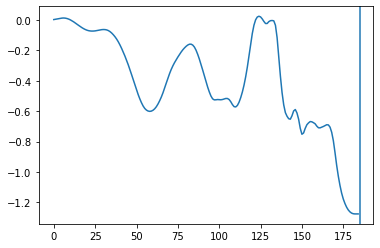

In [ ]:
plt.plot(method.get_parameters()[0].cpu().detach().numpy())
plt.axvline(x=observed_train.shape[0])
plt.show()

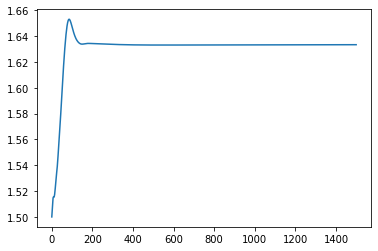

In [ ]:
plt.plot(list_R0)

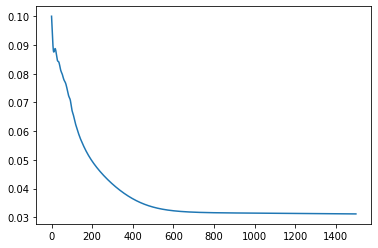

In [ ]:
plt.plot(list_sigma)

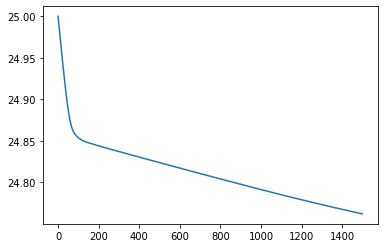

In [ ]:
plt.plot(list_phi)

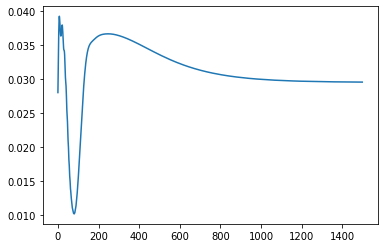

In [ ]:
plt.plot(list_alpha)

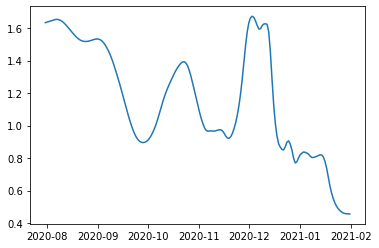

In [ ]:
df_rvalue = pd.DataFrame()
df_rvalue['date'] = df_obs.Date
df_rvalue['R_t'] = method.calculate_R().detach().numpy()
df_rvalue.to_csv('data/infered_rvalue.csv', index=False)
plt.plot(df_rvalue['date'], df_rvalue['R_t'])